# Lab: Supervised Learning

### Objective: using the knowledge/techniques learnt during lectures to solve a facial recognition problem using scikit-learn. 

What will you learn: 

1. scikit-learn basics
2. data processing/visualization
3. model training
4. model evaluation

## Task 1: learn scikit-learn basics

Follow this [tuturial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) to learn the basics of 
scikit-learn. Make sure you install scikit learn properly and you work on Jupyter Lab environment. 

## What is facial recognition ?

Face recognition is the task of comparing an unknown individual’s face to images in a database of stored records. The mapping could be one–to–one or one–to–many, depending on whether we are running face verification or face identification.

There are 4 main steps toward facial recognition: 


1. Detect faces in an image

2. Crop & align faces for uniformity

3. Find vector representation for each face

Since programs can’t work with jpg or png files directly, we need some way of translating images to numbers. This can be done using state-of-the-art deep learning models such as InsightFace, ArcFace. However, to simplify the problem, we will be using a simple PCA (we will learn this in the next lecture) for this purpose. 


4. Comparing the embeddings

Once we have translated each unique face into a vector, comparing faces essentials boils down to comparing the corresponding embeddings (a.k.a features vector). We will be making use of these embeddings to train a sci-kit learn model.

### Assumption

To simplify the problem, we assume that all the faces have been detected and cropped. We will work on the 3rd and 4th points only. 

## Task 2: loading and preprocessing 

We will use lfw (Labeled Face in the Wild) dataset for this purpose. 

In [1]:
# Loading lfw dataset
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features (50*37): %d" % n_features)
print("n_classes: %d" % n_classes)
print("all the people names in the datset: %s"% target_names)
print("shape of image data:", lfw_people.images.shape)

Total dataset size:
n_samples: 1288
n_features (50*37): 1850
n_classes: 7
all the people names in the datset: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
shape of image data: (1288, 50, 37)


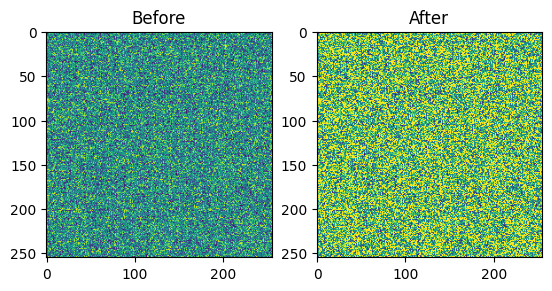

In [2]:
# plot images with target name
import numpy as np
import matplotlib.pyplot as plt


# The codes below show how to use matplotlib to plot two images (1 row and 2 columns)

random_image = np.random.rand(255, 255)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(random_image)
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(random_image)
imgplot.set_clim(0.0, 0.7)
ax.set_title('After')
plt.show()

Now adapt the above code to plot the images in lfw dataset. Your plot should contains: 

1. 7 rows (7 different people). 
2. each row has 5 images (columns) coming from the same person

Hints:

1. when showing big plot, use figsize to adapt the plot size. 
2. subplot index starts from 1, not 0


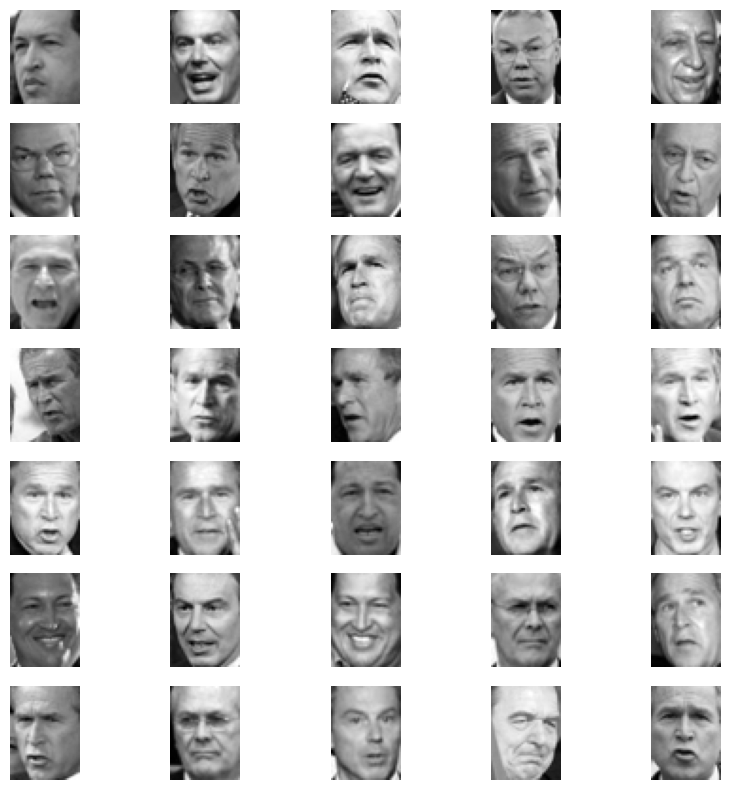

In [3]:
# write your code here.
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(10, 10))
for i in range(7):
    for j in range(5):
        axes[i, j].imshow(lfw_people.images[i * 5 + j], cmap='gray')
        axes[i, j].axis('off')
plt.show()

Split data into train, test set


1. use train_test_split from scikit learn package to split the data (X, y) into 80% training, 20% testing
2. What are the utilities of "random_state" and why should we use it? 

In [5]:
# write your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Data should be standardized (0 mean and 1 variance)

1. Use StandardScaler from scikit learn package to transform data into 0 mean and 1 variance
2. Explain why this is necessary

Hint: do not forget to transform also the X_test.

In [7]:
# write your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


## Task 3: training the model

In [18]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

Start training with decision tree.

1. Read this article https://scikit-learn.org/stable/modules/tree.html
2. Start training with decision tree
3. Report performance using accuracy
4. Visualize your tree

In [19]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

y_pred = dt.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {:.2f}".format(accuracy))

Decision Tree Accuracy: 0.49


Start training with SVM

1. Read this article https://scikit-learn.org/stable/modules/svm.html
2. Start training with decision tree
3. Report performance using accuracy
4. Visualize your tree

In [20]:
# write your code here
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: {:.2f}".format(accuracy))

SVM Accuracy: 0.78


## Task 4 (optional, for the challengers)

1. collect 100 photos and crop only the face
2. add it to the dataset
3. retrain your svm model
4. use opencv (with webcame) to connect to your model
5. try testing your new model in real time using your webcam

Hint: https://realpython.com/face-detection-in-python-using-a-webcam/